In [169]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import tensorflow as tf
import keras
import keras_metrics as km

from keras.callbacks import TensorBoard
from keras import regularizers
from custom_callbacks import LrFinder
from custom_callbacks import CycleLearner
from custom_callbacks import reset_weights
from keras.callbacks import ModelCheckpoint
from time import time
from keras.layers import Input, Dense,Dropout,BatchNormalization,LSTM,GRU,Bidirectional,Conv2D, MaxPool2D, Flatten, GlobalAvgPool2D, GlobalMaxPool2D,merge
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras import backend as K
import math
import json

# Get the dictionary containing each metric and the loss for each epoch


In [170]:
def get_log(name):
     return json.load(open(train_filepath + working_level + "/model_run_history/" + name + ".json", 'r'))

In [171]:
def save_log(log,name):
    log_dict = log.history    
    json.dump(log_dict, open(train_filepath + working_level + "/model_run_history/" + name + ".json", 'w'))

In [172]:
def generate_log_name(model_name,data_type,kmer,emb_type):
    return model_name + "-" + data_type + "-" + str(kmer) + "-" + emb_type

In [173]:
train_filepath = "train_workspace/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
dataList = ["Ohnologs","No-Ohnologs","Paralogs"]
dataNameList = ["ohnologs","no-ohnologs","paralog"]

sns.set_style("darkgrid")

In [174]:
working_level = "Strict"
kmers = [3,8]
emb_types = ["normal","complete","cdna","cdna2"]
models_flat = ["Level","Flat_meta","Flat_complete"]
models = ["Flat","Level"]
datas = ["complete","diferential"]

In [175]:
log = get_log(generate_log_name("Flat_meta","complete",8,"cdna"))
np.mean(log["val_acc"][-int(len(log["val_acc"])*0.2):])

0.8763898116532166

In [176]:
matrix_models_mean = np.ndarray(shape=(6,4))

In [177]:
matrix_models_std = np.ndarray(shape=(6,4))

In [178]:
len(log["val_acc"][-int(len(log["val_acc"])*0.2):])

150

In [179]:
matrix_models_mean[0]

array([66.01417046, 66.42158791, 67.07153028, 66.40165435])

In [180]:
i = 0
for model_flat in models_flat:    
    for kmer in kmers:
        j = 0
        for emb_type in emb_types:       
            log = get_log(generate_log_name(model_flat,"complete",kmer,emb_type))
            if(model_flat == "Level"):
                matrix_models_mean[i,j] = np.mean(log["val_aux_acc"][-int(len(log["val_aux_acc"])*0.2):])      
                matrix_models_std[i,j] = np.std(log["val_aux_acc"][-int(len(log["val_aux_acc"])*0.2):])      
            else:
                matrix_models_mean[i,j] = np.mean(log["val_acc"][-int(len(log["val_acc"])*0.2):])  
                matrix_models_std[i,j] = np.std(log["val_acc"][-int(len(log["val_acc"])*0.2):])      
            j +=1        
        i +=1
matrix_models_mean

array([[0.6601417 , 0.66421588, 0.6707153 , 0.66401654],
       [0.68274052, 0.67761611, 0.71279205, 0.6842708 ],
       [0.87295048, 0.86883405, 0.87436798, 0.87392976],
       [0.87053631, 0.87910774, 0.87638981, 0.8744803 ],
       [0.71784528, 0.72328429, 0.73435691, 0.70648948],
       [0.73856985, 0.74178611, 0.74791963, 0.7341639 ]])

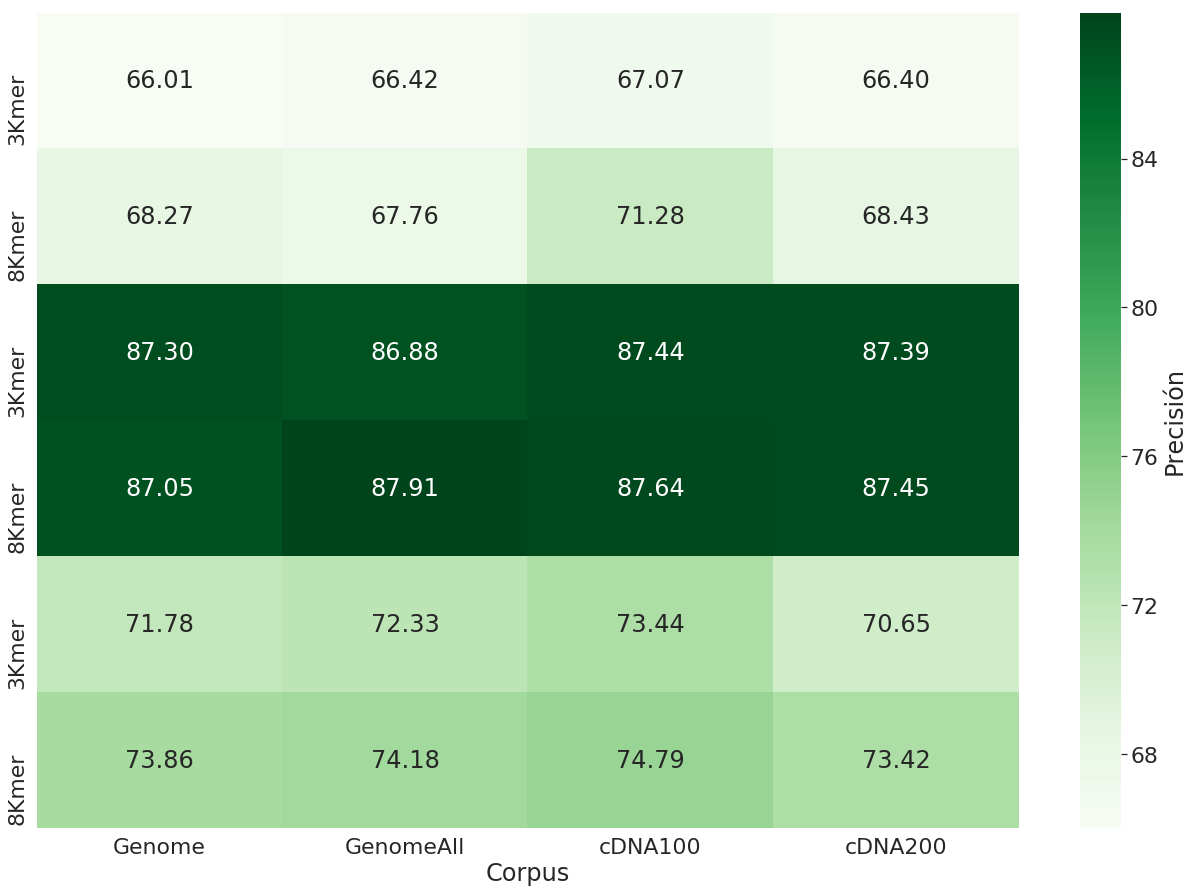

In [182]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_mean*100,annot=True,cmap="Greens",fmt='.2f',square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer","3Kmer","8Kmer","3Kmer","8Kmer"],cbar_kws={'label': 'Precisión'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("flat_precision_v2.png")

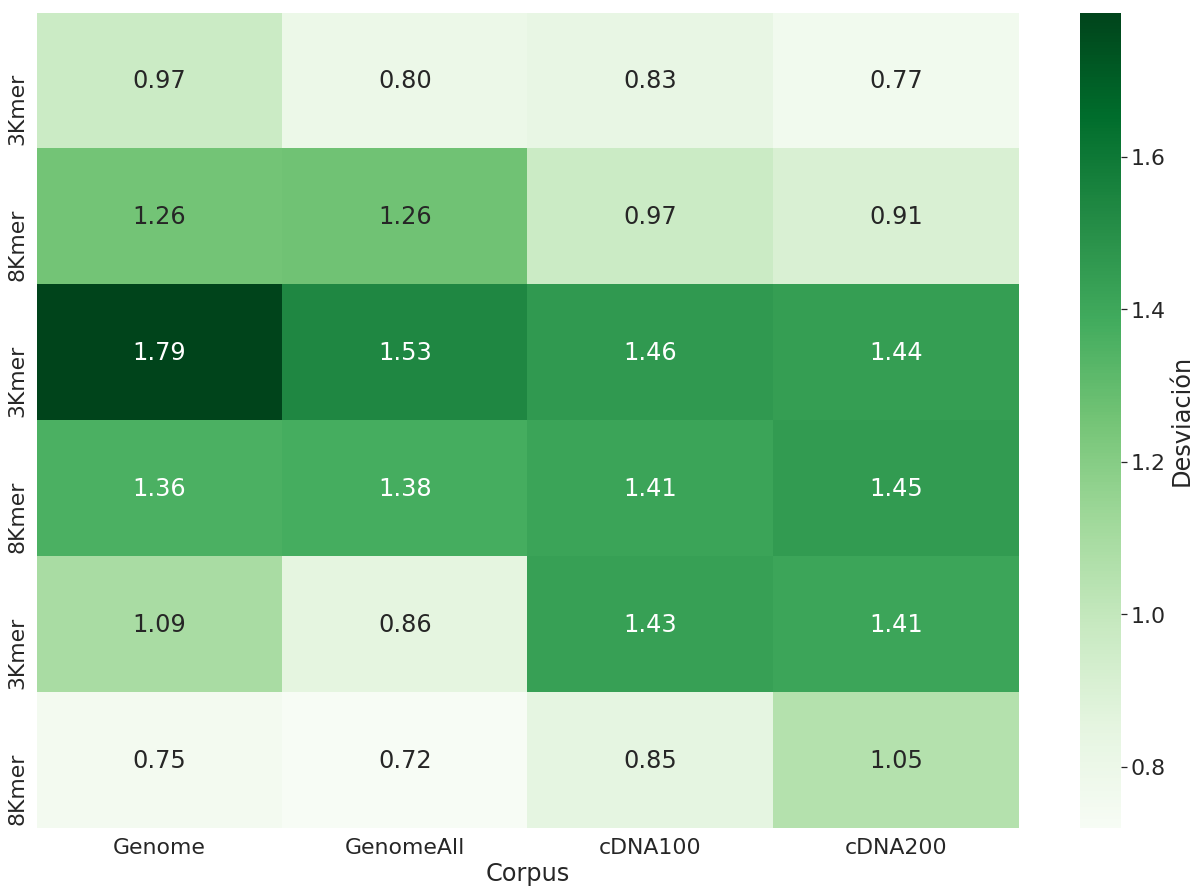

In [183]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_std*100,annot=True,cmap="Greens",fmt='.2f',square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer","3Kmer","8Kmer","3Kmer","8Kmer"],cbar_kws={'label': 'Desviación'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("flat_std_v2.png")

In [52]:
matrix_models_mean[0,0,0]

6.90082817901213e-310

In [53]:
type(log["val_main_acc"][-int(len(log["val_main_acc"])*0.2):])

list

In [184]:
log = get_log(generate_log_name("Level","complete",8,"cdna"))
matrix_models_level_mean = np.ndarray(shape=(2,4,len(log["val_main_acc"][-int(len(log["val_main_acc"])*0.2):])))
matrix_models_level_std = np.ndarray(shape=(2,4,len(log["val_main_acc"][-int(len(log["val_main_acc"])*0.2):])))
i = 0
for kmer in kmers:
    j = 0
    for emb_type in emb_types:       
        log = get_log(generate_log_name("Level","complete",kmer,emb_type))                
        matrix_models_level_mean[i,j] = np.asarray(log["val_main_acc"][-int(len(log["val_main_acc"])*0.2):])
        matrix_models_level_std[i,j] = np.asarray(log["val_main_acc"][-int(len(log["val_main_acc"])*0.2):])                        
        j +=1        
    i +=1
matrix_models_level_mean[0][0]

array([0.91480778, 0.91646891, 0.90650214, 0.9155197 , 0.90341718,
       0.91907926, 0.91765543, 0.91741813, 0.91789274, 0.91290935,
       0.91884196, 0.9155197 , 0.91694352, 0.90317988, 0.91623161,
       0.91243474, 0.91813004, 0.91623161, 0.91694352, 0.90863787,
       0.91290935, 0.90531562, 0.91314665, 0.90911248, 0.91670622,
       0.91457048, 0.91267205, 0.91172283, 0.91219744, 0.91884196,
       0.91290935, 0.90887518, 0.91765543, 0.91504509, 0.90887518,
       0.90555292, 0.90602753, 0.91623161, 0.91694352, 0.90579022,
       0.91362126, 0.91267205, 0.91148552, 0.91314665, 0.91741813,
       0.91433317, 0.91623161, 0.91694352, 0.91979117, 0.91646891,
       0.9155197 , 0.91504509, 0.90745135, 0.91243474, 0.8986711 ,
       0.90982439, 0.9043664 , 0.91409587, 0.91457048, 0.91670622,
       0.91718083, 0.91623161, 0.91528239, 0.90934979, 0.91528239,
       0.91290935, 0.91243474, 0.91243474, 0.91623161, 0.90768866,
       0.9155197 , 0.915757  , 0.90626483, 0.91504509, 0.91741

In [185]:
kmers = ["3kmer","8kmer"]
metrics = ["Precision","STD"]
models_names = ["Genome","GenomeALL","cDNA100","cDNA200"]
df_temp = pd.DataFrame(models)

models = []

for models_name in models_names:
    for kmer in kmers:
        for metric in metrics:
            models.append(models_name + " " + kmer + " " + metric)
            
df_temp = pd.DataFrame(columns = ["Model Name","Kmer","Precision"])            
df_temp.head()

,Model Name,Kmer,Precision


In [186]:
i = 0
model_name_list = []
kmer_list = []
values_list = []
for models_name in models_names:
    j = 0
    for kmer in kmers:        
        for k in range(0,350):
            model_name_list.append(models_name)
            kmer_list.append(kmer)
            metric_list.append(metric)    
            values_list.append(matrix_models_level_mean[j,i,k])                            
        j += 1    
    i += 1
    
df_temp["Model Name"] = model_name_list
df_temp["Kmer"] = kmer_list
df_temp["Precision"] = values_list
df_temp.head()

,Model Name,Kmer,Precision
0,Genome,3kmer,0.914808
1,Genome,3kmer,0.916469
2,Genome,3kmer,0.906502
3,Genome,3kmer,0.915520
4,Genome,3kmer,0.903417


In [112]:
std_labels

['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0']

In [115]:
std = df_temp.groupby(['Model Name',"Kmer"])['Precision'].std().values
std_labels = [str(np.round(s*100, 2)) for s in std]
std_labels

['0.46', '0.41', '0.44', '0.36', '0.43', '0.46', '0.39', '0.46']

In [151]:
pos

range(0, 8)

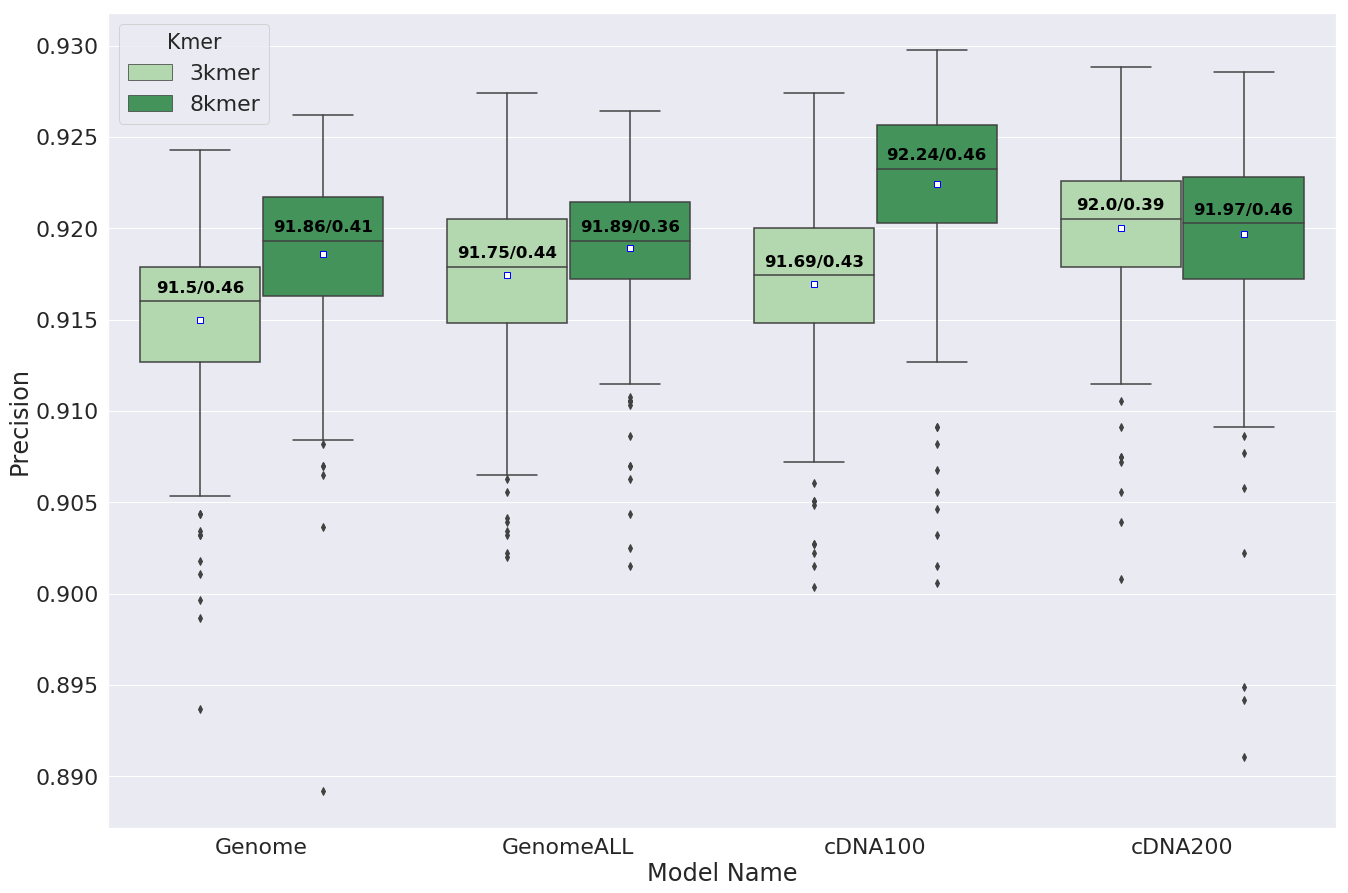

In [187]:
plt.subplots(figsize=(22,15))
ax = sns.boxplot("Model Name","Precision","Kmer",data=df_temp,showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},palette="Greens")

std = df_temp.groupby(['Model Name',"Kmer"])['Precision'].std().values
mean = df_temp.groupby(['Model Name',"Kmer"])['Precision'].mean().values
median = df_temp.groupby(['Model Name',"Kmer"])['Precision'].median().values
labels = [str(np.round(m*100, 2)) + "/" + str(np.round(s*100, 2)) for (s,m) in zip(std,mean)]

pos = range(len(std))
for tick in pos:  
    if(tick % 2 == 0):
        ax.text(pos[tick]-0.2 - 0.5*pos[tick], median[tick]+0.0005 , labels[tick], 
                horizontalalignment='center', size='x-small', color='black', weight='semibold')
    else:
        ax.text(pos[tick] - 0.3 - 0.5*pos[tick], median[tick]+0.0005 , labels[tick], 
                horizontalalignment='center', size='x-small', color='black', weight='semibold')
        
fig = ax.get_figure()
fig.savefig("level_v2.png")

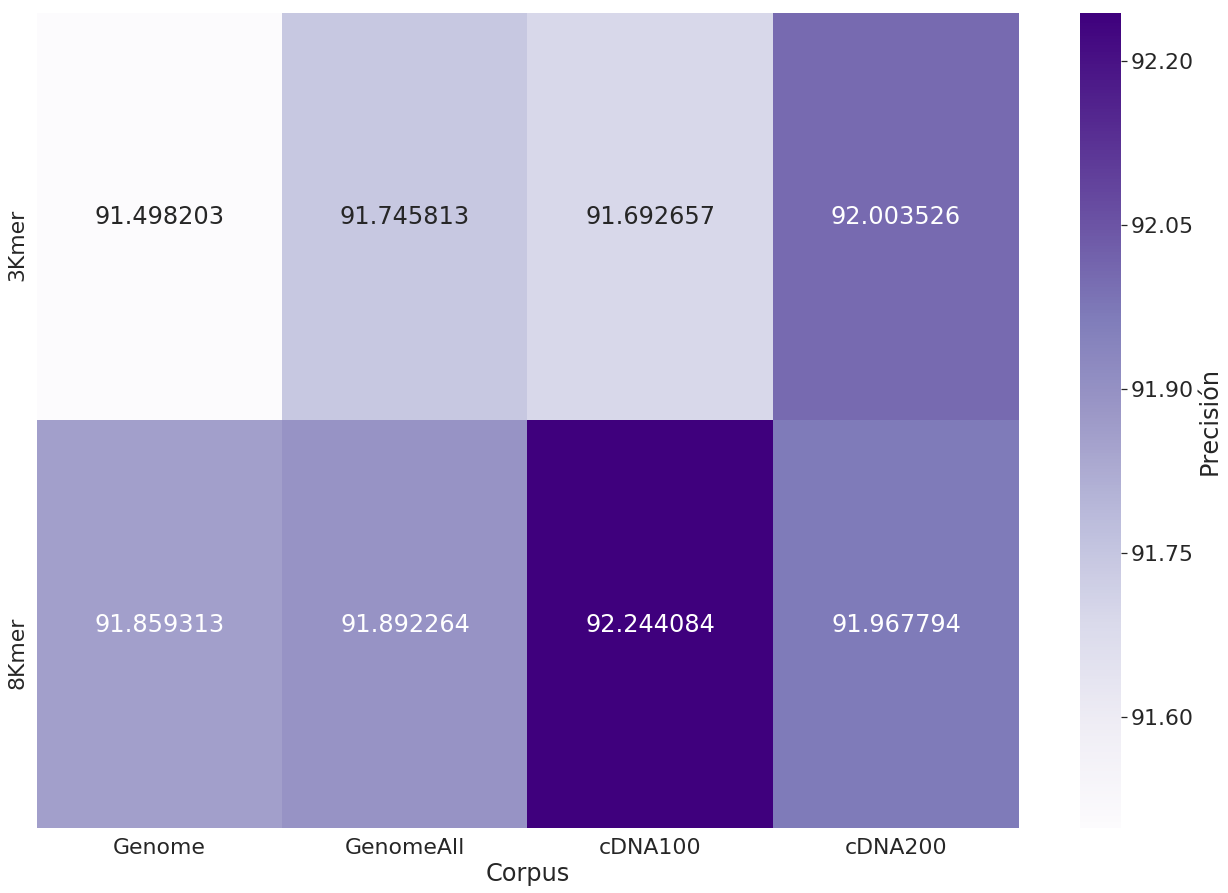

In [36]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_level_mean*100,annot=True,fmt="f", cmap="Purples",square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer"],cbar_kws={'label': 'Precisión'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("level_precision.png")

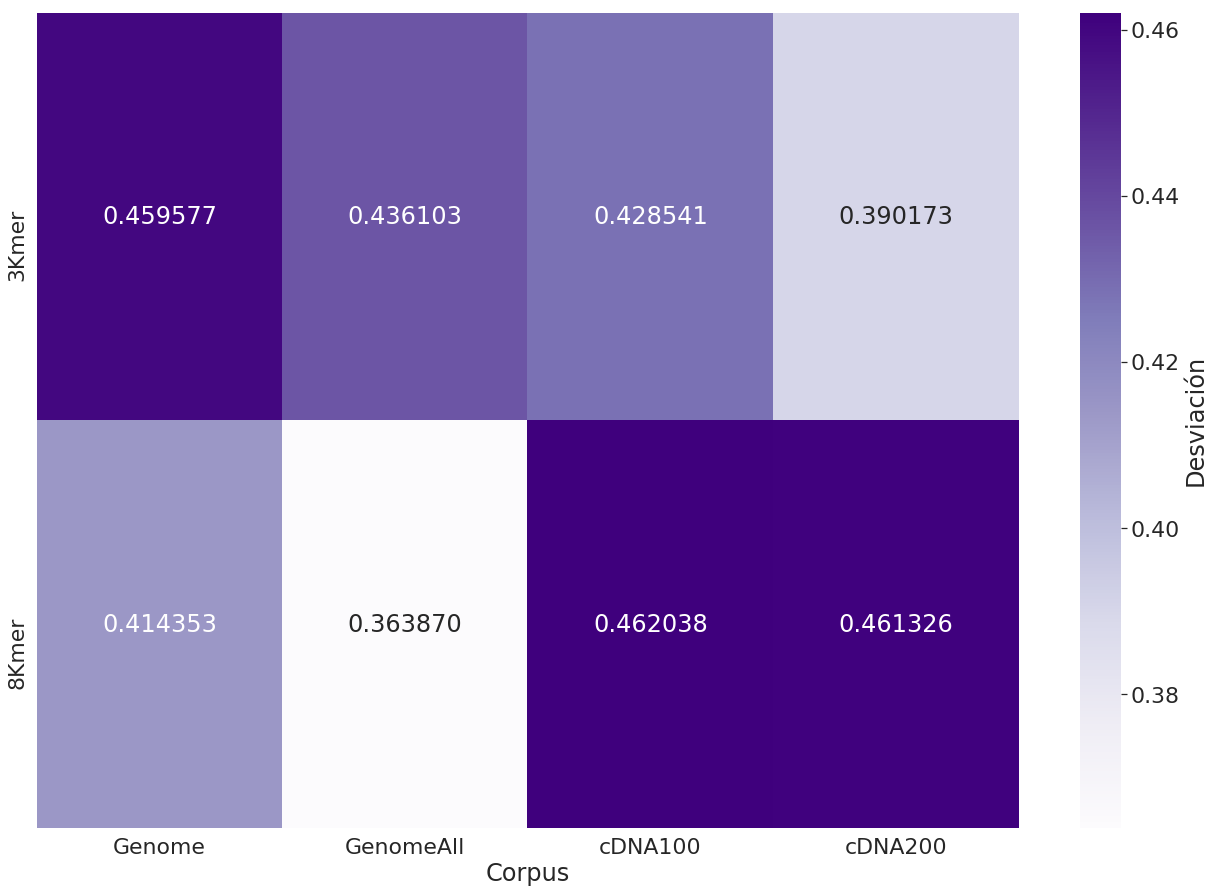

In [37]:
sns.set(font_scale=2)
plt.subplots(figsize=(22,15))
ax = sns.heatmap(matrix_models_level_std*100,annot=True,fmt="f", cmap="Purples",square=False,xticklabels = ["Genome","GenomeAll","cDNA100","cDNA200"],yticklabels=["3Kmer","8Kmer"],cbar_kws={'label': 'Desviación'})
ax.set(xlabel='Corpus')
fig = ax.get_figure()
fig.savefig("level_std.png")